# Tarea 1 - Amazon food review

**Integrantes: Fernanda Weiss 201373536-3 / Ignacio Espinoza 201073527-3 **

En esta tarea se trabajará con el dataset *Amazon Fine Food Review*, el cual contiene más de 500.000 críticas de platos de comida y restaurants provenientes de Amazon. El archivo consiste en un .csv (“Comma Separate Values”) el cual contiene la siguiente estructura:

- **Id** - Id único de cada reseña
- ** ProductId** - Id único que identifica el producto a analizar
- **UserId** - Id único que identifica al usuario
- **ProfileName** - Nombre del usuario que realizó la reseña
- **HelpfulnessNumerator** -  número de usuarios que indicaron que encontraron esta crítica util
- **HelpfulnessDenominator** número de usuarios que indicaron que encontraron esta crítica util -
- **Score** - Rating, con valores entre 1 y 5 estrellas
- **Time** - timestamp for the review
- **Summary** - breve resumen de la reseña
- **Text** - string que contiene la reseña 

Para poder hacer un análisis de las reviews, su contenido y qué información podemos recuperar de ellas, solo nos quedaremos con el atributo *Text*, consistente en la reseña que hace cada persona sobre comida. El resto de los datos no agrega información relevante para este estudio.

En primer lugar se carga el corpus, quitando todo el código HTML existente con BeautifulSoup, así solo se mantendrá el contenido que exista dentro de los tag. Las reseñas se almacenan en la lista **corpus**, la cual tiene una estructura de lista de listas *corpus[[documento1],[documento2],...]*. A su vez, se tiene una lista **score** con la evaluación de los usuarios en cada reseña (esta información será utilizada más adelante).

In [1]:
# -*- coding: utf-8 -*-
from bs4 import BeautifulSoup
import pandas as pd

#reviews = open("amazon-fine-foods/Reviews.csv", "r")
corpus = []
score = []
reviews = pd.read_csv("amazon-fine-foods/Reviews.csv")

reviews = reviews.as_matrix()

corpus = reviews[:,[-1]]
score = reviews[:,[6]]

Una vez cargada la información del corpus se procede a tokenizar cada documento. La tokenización corresponde a romper una secuencia de strings en piezas, en ese caso será en palabras. Mediante una expresión regular se quita todo número y signo de puntuación existente, quedando así, solo letras.Esta información se guarda en la lista **tokens_doc** (lista de listas de tokens). 

En este proceso también se aplica *lower case a las palabras*.

In [2]:
from nltk.tokenize import RegexpTokenizer, regexp_tokenize

tokens_doc = [] #tokens por documento/sentencia

for text in corpus:
    t = regexp_tokenize(text[0].lower(), pattern='[a-zA-Z]+')
    tokens_doc.append(t)
print tokens_doc[:2]

[['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most'], ['product', 'arrived', 'labeled', 'as', 'jumbo', 'salted', 'peanuts', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'jumbo']]


Una vez que tenemos los tokens para cada documento, se carga la lista de stopwords desde la librería de nltk. Las stopwords son aquellas palabras que no son descriptivas para el corpus.
Una vez que se realizó el filtrado de las stopwords de nltk se vió que aún existian palabras que no permitían un buen analisis, que no entregaban información relevante, por lo que se creo un archivo con aquellas palabras que nosotros observamos, *'stopwords.txt*. Esta lista la juntamos con la anterior y se procede a filtrar las palabras de cada documento. Los criterio para que no sean eliminados son:

* No estar en la stoplist
* Largo mayor o igual a 3
* Frecuencia de la palabra en el corpus completo sea mayor o igual a 4

Los tokens son guardados en la lista **tokens**, lista de lista de tokens. En base a esta lista, se crea otra lista, llamada **all_tokens** la cual contiene todos los tokens del corpus, sin separación entre documentosla cual nos permite generar la distribución de las palabras en el corpus según su frecuencia, y así poder utilizar esto como criterio de filtrado.

Se escogió eliminar palabras con frecuencia menor a 4 porque en su mayoría eran palabras sin sentido, palabras mal escritas, palabras en otros idiomas (como chino), entre otros.
             

In [3]:
import nltk
from nltk.corpus import stopwords

# making stoplist with custom stopwords and library stopwords
stoplist = []
f = open("stopwords.txt","r")
for sw in f:
    stoplist.append(sw.strip())
f.close()
stoplist += stopwords.words('english') # stopwords


all_tokens = [token for doc in tokens_doc for token in doc]

frec_dist = nltk.FreqDist(all_tokens) # frec distribution of tokens

# create list of list without stopwords
tokens = []
for doc in tokens_doc: 
    t = []
    
    for token in doc:
        if token not in stoplist and len(token) >= 3 and frec_dist[token] >= 4:
            t.append(token)
    tokens.append(t)
            
print tokens[:2]

[['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better'], ['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo']]


Respecto al resultado entregado en la celda anterior, se ve que las palabras que no entregan valor al análisis, stopwords, fueron eliminadas, tales como *i*, *of*, *to*, *be*, *the*, entre otras.

In [5]:
%matplotlib inline
from wordcloud import WordCloud
wc = ""
for doc in tokens[:100000]:
    wc = wc +" ".join(doc)

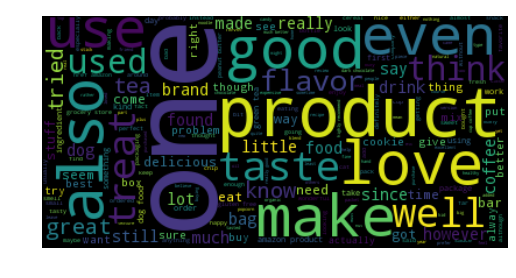

In [6]:
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(wc)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

La imagen anterior corresponde a un Word Cloud de las reviews de comida, resaltando palabras relevantes del corpus. De ella podemos decir que las reviews en general deberían ser positivas, pues las palabras *good*, *love*, *better*, *great*, aparecen en gran cantidad.

# Collocations

Se vuelve a generar la lista **all_tokens**, ya que en el paso anterior se eliminaron algunas palabras, por lo que se debe actualizar.
El objetivo de este paso es generar el top-30 collocations, formadas por bigramas. Las collocations son aquellas  palabras que generalmente van juntas dentro de un texto, la cantidad de estas palabras se define según el n-grama usado, este caso es de a dos palabras, por lo tanto se deben buscar los 30 pares de palabras que generalmente van juntas dentro de las reviews de comida de amazon.
Para lograr este objetivo se ejecutan 4 métricas de proximidad entre las palabras:

* likelihood_ratio: Utiliza los ratios de verosimilitud en los bigramas.
* raw_freq: Usa la frecuencia, y considera todos los bigramas en el texto como candidatos de collocations.
* pmi: Usa Pointwise Mutual Information.
* chi_sq: Determina los bigramas utilizando la distribución chi-cuadrado.

Comparando estos resultados, se observa que *likelihood_ratio* entrega un mejor resultado. Luego, le sigue *raw_freq* y *pmi*. Finalmente, la que entrega peores resultados es la *chi_sq*.

En general los resultados de *likelihood_ratio* y *raw_freq* son casi iguales, cambiando el orden de algunos bigramas en la lista de top 30. Se pueden distinguir claramente combinaciones de palabras que uno esperaría encontrar en un dataset que habla sobre comida, como por ejemplo, gluten free, peanut butter, grocery store. Otros más obvios como Amazon com, especialmente porque la información proviene de Amazon.com. 

Por otro lado, *pmi* y *chi_sq* entregan resultados de muy mala calidad. En general son palabras sin sentido y que como bigramas no significan nada.


In [7]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

all_tokens = [token for doc in tokens for token in doc]

finder = BigramCollocationFinder.from_words(all_tokens)
#print finder.items()[0:5]

top_collocations = finder.nbest(bigram_measures.likelihood_ratio, 30) #top 30 bigramas
print top_collocations[:30], "\n"

scored = finder.score_ngrams(bigram_measures.raw_freq)
print scored[:30], "\n"

scored = finder.score_ngrams(bigram_measures.pmi)
print scored[:30], "\n"

scored = finder.score_ngrams(bigram_measures.chi_sq)
print scored[:30], "\n"

[('http', 'www'), ('href', 'http'), ('amazon', 'com'), ('peanut', 'butter'), ('gluten', 'free'), ('www', 'amazon'), ('highly', 'recommend'), ('grocery', 'store'), ('com', 'product'), ('subscribe', 'save'), ('year', 'old'), ('green', 'tea'), ('earl', 'grey'), ('dog', 'food'), ('much', 'better'), ('years', 'ago'), ('green', 'mountain'), ('olive', 'oil'), ('dark', 'chocolate'), ('cat', 'food'), ('tastes', 'like'), ('highly', 'recommended'), ('cup', 'coffee'), ('expiration', 'date'), ('high', 'quality'), ('coconut', 'oil'), ('science', 'diet'), ('hard', 'find'), ('sea', 'salt'), ('ice', 'cream')] 

[(('amazon', 'com'), 0.000975607339215654), (('gluten', 'free'), 0.0007403085054177511), (('http', 'www'), 0.0007326513841035008), (('www', 'amazon'), 0.0007285525721058728), (('com', 'product'), 0.0007239132574272388), (('href', 'http'), 0.0007148598375203899), (('taste', 'like'), 0.0006797271632550063), (('highly', 'recommend'), 0.0006559450452907465), (('peanut', 'butter'), 0.0006332439326884

# POS-tagger 

El proceso POS (Part-Of-Speech) tagger, se encarga de etiquetar cada uno de los tokens de acuerdo a la función que cumple en el texto, su categoria gramatical, por ejemplo si un token es un verbo, sustantivo, etc.

Tanto para POS y NER tagger utilizamos el POS tagger de Standford, en el cual se debe especificar el ejecutable jar Standford en Java y el modelo entrenado según el cuál se analizará el corpus actual. Además, se utilizará el pos-tagger que viene en nltk para comparar resultados.

Los modelos entregados para POS tagger están basados en el Wall Street Journal, teniendo distintas caracteristicas cada uno de ellos. En que ocuparemos será 'english-bidirectional-distsim.tagger', el cuál utiliza una arquitectura bidireccional e incluyen la forma de las palabras y distribución de características similares.

Ya que el método de PoS-tagger crece linealmente en relación a los datos, se calculó que correr el proceso sobre todos los datos tomaría unas cien horas (1 hora para 5000 reviews que son el 1% de los datos). Debido a esto, solo se corrió el código con un porcentaje menor de información.

In [8]:
from nltk.tag import StanfordPOSTagger

jar = 'pos-tagger/stanford-postagger.jar'
model = 'pos-tagger/english-bidirectional-distsim.tagger'

st = StanfordPOSTagger(model,jar)
print tokens[0]
print st.tag(tokens[0])

pos = [st.tag(doc) for doc in tokens[:5000]]

print "\nStandfor Pos-tagger\n"
print pos[:2]

['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']
[(u'bought', u'VBD'), (u'several', u'JJ'), (u'vitality', u'NN'), (u'canned', u'VBD'), (u'dog', u'NN'), (u'food', u'NN'), (u'products', u'NNS'), (u'found', u'VBD'), (u'good', u'JJ'), (u'quality', u'NN'), (u'product', u'NN'), (u'looks', u'VBZ'), (u'like', u'IN'), (u'stew', u'NN'), (u'processed', u'JJ'), (u'meat', u'NN'), (u'smells', u'VBZ'), (u'better', u'JJR'), (u'labrador', u'NN'), (u'finicky', u'NN'), (u'appreciates', u'VBZ'), (u'product', u'NN'), (u'better', u'RBR')]

Standfor Pos-tagger

[[(u'bought', u'VBD'), (u'several', u'JJ'), (u'vitality', u'NN'), (u'canned', u'VBD'), (u'dog', u'NN'), (u'food', u'NN'), (u'products', u'NNS'), (u'found', u'VBD'), (u'good', u'JJ'), (u'quality', u'NN'), (u'product', u'NN'), (u'looks', u'VBZ'), (u'like', u'IN'), (u'ste

In [9]:
pos = [nltk.pos_tag(doc) for doc in tokens[:5]]

print "\nNLTK pos-tagger\n"
print pos[:2]


NLTK pos-tagger

[[('bought', 'VBD'), ('several', 'JJ'), ('vitality', 'NN'), ('canned', 'VBD'), ('dog', 'JJ'), ('food', 'NN'), ('products', 'NNS'), ('found', 'VBD'), ('good', 'JJ'), ('quality', 'NN'), ('product', 'NN'), ('looks', 'VBZ'), ('like', 'IN'), ('stew', 'NN'), ('processed', 'VBN'), ('meat', 'NN'), ('smells', 'NNS'), ('better', 'RBR'), ('labrador', 'NN'), ('finicky', 'JJ'), ('appreciates', 'VBZ'), ('product', 'NN'), ('better', 'RBR')], [('product', 'NN'), ('arrived', 'VBD'), ('labeled', 'JJ'), ('jumbo', 'NN'), ('salted', 'VBD'), ('peanuts', 'NNS'), ('peanuts', 'NNS'), ('actually', 'RB'), ('small', 'JJ'), ('sized', 'VBN'), ('unsalted', 'JJ'), ('sure', 'JJ'), ('error', 'NN'), ('vendor', 'NN'), ('intended', 'VBN'), ('represent', 'JJ'), ('product', 'NN'), ('jumbo', 'NN')]]


## Comparación

El resultado del tagger de stanford es bueno, pudiendo determinar perfectamente la etiqueta de palabras como dog (sustantivo), several (adjetivo), like (preposición), entre otros.

En general, para las dos primeras reseñas los resultados son similares. Para la primera reseña hay tres términos con etiquetas diferentes que son **dog**, **smells** y **better**. En el siguiente recuadro se ve las difercias que hay con estas palabras. 

| Palabra | Tag Stanford                           | Tag NLTK                    |
|---------|----------------------------------------|-----------------------------|
| dog     | NN (sustantivo)                        | JJ (adjetivo)               |
| smells  | VBZ (verb, 3ra persona sing. presente) | NNS (sustantivo plural)     |
| better  | JJR (adjectivo, comparativo)           | RBR (adverbio, comparativo) |

Para dog y smells las etiqueta está erronea en NLTK, pues en contexto es se habla de un sustantivo y de un verbo, respectivamente. Para better funcionan ambas etiquetas.

Para el segundo texto, se da que stanford falla con la etiqueta de labeled pero hacierta con jumbo y salted.

| Palabra | Tag Stanford                           | Tag NLTK                    |
|---------|----------------------------------------|-----------------------------|
| labeled | NN (sustantivo)                        | JJ (adjetivo)               |
| jumbo   | JJ (adjetivo)                          | NN (sustantivo)             |
| salted  | JJ (adjetivo)                          | VBD (verb, tiempo pasado)   |

Dado estos resultados no se puede decir que los métodos sean malos. Ambos pueden etiquetar palabras y determinar que con un alto grado de confianza. Aún así, hay características del contexto que hacen que estas palabras sean equitedas con un diferente tag.


# NER-tagger

El proceso NER (Named Entity Recognizer) tagger, se encarga de identificar entidades dentro del texto, es decir si es una organización, persona, etc. 

El modelo utilizado es el *english.all.3class.distsim*. Se muestran más abajo los resultados de los primeros 100 documentos que están con tags. Para 100 documentos son muy pocas las palabras que el NER logra etiquetar.

La mayoría de las etiquetas de ubicación están bien colocadas pero las de organización no. Puede ser por una mayor sensibilidad a palabras continuas con letras mayúsculas. Ve este patron de palabras y tiene a asociarlas con algo, principalmente Organizaciones.

In [10]:
from nltk.tag import StanfordNERTagger

jar = 'ner-tagger/stanford-ner.jar'
model = 'ner-tagger/english.all.3class.distsim.crf.ser.gz'


st = StanfordNERTagger(model, jar) 
ner = [st.tag(doc[0].split()) for doc in corpus[:10000]]

In [12]:
for doc in ner[:100]:
    for tag in doc:
        if tag[1] != u'O':
            print tag

(u'Labrador', u'LOCATION')
(u'Edmund', u'PERSON')
(u'Strawberry', u'PERSON')
(u'Lancaster', u'LOCATION')
(u'Pennsylvania', u'LOCATION')
(u'Y', u'ORGANIZATION')
(u'&', u'ORGANIZATION')
(u'S', u'ORGANIZATION')
(u'Candies,', u'ORGANIZATION')
(u'Inc.', u'ORGANIZATION')
(u'United', u'LOCATION')
(u'States,', u'LOCATION')
(u'Hershey', u'ORGANIZATION')
(u'Y', u'ORGANIZATION')
(u'&', u'ORGANIZATION')
(u'S', u'ORGANIZATION')
(u'Candies,', u'ORGANIZATION')
(u'Inc.', u'ORGANIZATION')
(u'Amazon', u'ORGANIZATION')
(u'US', u'LOCATION')
(u'Mexico', u'LOCATION')
(u'Amazon', u'LOCATION')
(u'Latte', u'ORGANIZATION')
(u'Macciato.', u'ORGANIZATION')
(u'No', u'ORGANIZATION')
(u'Coffee', u'ORGANIZATION')
(u'Shop', u'ORGANIZATION')
(u'Amazon', u'LOCATION')
(u'Kroger', u'ORGANIZATION')
(u'JERRY', u'PERSON')
(u'REITH...', u'PERSON')
(u'Amazon', u'LOCATION')
(u"McCann's", u'ORGANIZATION')
(u'Oatmeal', u'ORGANIZATION')
(u'Oaker', u'ORGANIZATION')
(u'Oats', u'ORGANIZATION')
(u'Brown', u'PERSON')
(u'Sugar.', u'PERS

# Sentiment analysis

Finalmente se realiza un análisis de sentimiento de los reviews, es decir se determina cuan negativa, neutral y positiva es, entregando un resultado final que pondera estas tres métricas, el puntaje de sentiment analysis.

Para este propósito se utiliza Vader, dado que es un analizador de sentimientos basado en reglas que están específicamente en sintonía con los sentimientos expresados en los medios sociales. Así, para un corpus como el nuestro, que está escrito en un entorno en que se entrega opiniones como generalmente ocurre en redes soiales, funciona bien. 

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

polarity = []
sid = SentimentIntensityAnalyzer()
for sentence in corpus:
    for token in sentence:
        polarity.append(sid.polarity_scores(token)["compound"])

/usr/local/lib/python2.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [14]:
print corpus[0][0]
sid.polarity_scores(corpus[0][0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


{'compound': 0.9441, 'neg': 0.0, 'neu': 0.695, 'pos': 0.305}

Para cada sentencia analizada se asocia 4 pesos. **neg** es la nota de negatividad de la sentencia, **neu** es la nota de que tan neutral es, **pos** el nivel de positividad, y **compound** es el ponderado de las tres notas anteriores.

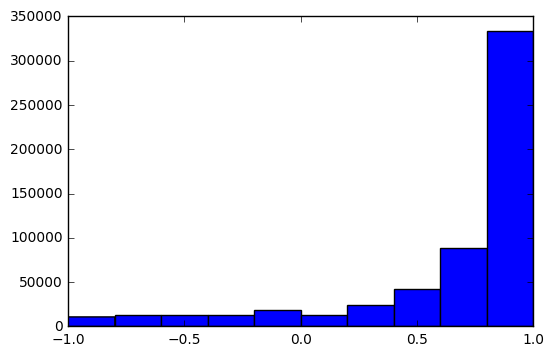

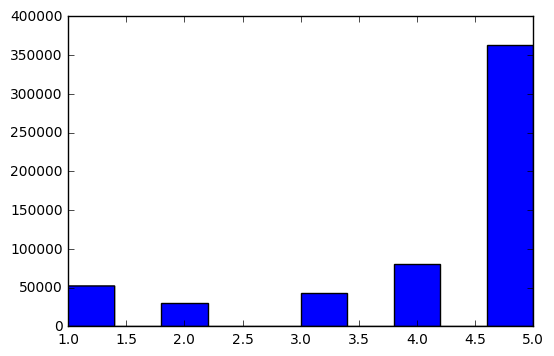

In [15]:
plt.hist(polarity)
plt.show()
plt.hist(score)
plt.show()


Del gráfico anterior podemos ver que el dataset está más orientado hacia opiniones neutras y positivas. De hecho, existe una cantidad aproximada de 140000 opiniones, tanto neutrales como positivas, y el resto de las opiniones están mas concentradas en tendencias positivas. Por lo tanto, la gente tiende a dar comentarios positivo respecto a lo que come.

Podemos ver que el resultado de análisis de sentimientos tiene una directa correlación con lo mostrado en el Word Cloud. En este, se veían palabras positivas mayormente, y el análisis de sentimientos mostró aproximadamente un 62% de reviews con sentimientos positivos (compound > 0.5). También tiene una directa correlación con los puntajes asignados por los usuarios a cada review, habiendo aproximadamente un 70% de con puntaje máximo.


# Conclusiones

Para concluir, es importante mencionar que para realizar análisis de algún corpus es necesario hacer un pre-procesamiento de los documentos, dado que algunas técnicas entregan resultados sin sentido o con poco valor analítico si se entrega contenido crudo, como por ejemplo, análisis de tópicos. 

También, la forma de pre- procesar la información no sigue un orden estricto, porque dependiendo de los datos y para el propósito que se quiere, es que un hacer un pre-procesamiento con un orden da un mejor resultado que con otro. 